In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Model
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import MaxPool1D
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU,AveragePooling1D,MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam ,SGD
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation,GRU,Bidirectional
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.layers import Conv1D
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D,Flatten
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import LeakyReLU ,ELU 

df = pd.read_csv("stock_sentiment_data.csv")


In [ ]:
df

,Tweet_Text,Sentiment,Tweet URL
0,"According to Gran , the company has no plans t...",Neutral,NaN
1,"For the last quarter of 2010 , Componenta 's n...",Positive,positive
2,"In the third quarter of 2010 , net sales incre...",Positive,positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,Positive,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",Positive,positive
...,...,...,...
13107,"Order intake , on the other hand , is expected...",Positive,NaN
13108,"Due to the rapid decrease in net sales , perso...",Negative,NaN
13109,"The order includes a log handling line , peeli...",Neutral,NaN
13110,Finnish insurance company Fennia and Kesko Gro...,Negative,NaN


In [ ]:
df.columns

Index(['Tweet_Text', 'Sentiment', 'Tweet URL'], dtype='object')

In [ ]:
tweet_df = df[['Tweet_Text','Sentiment']]
print(tweet_df.shape)
tweet_df.head(5)

(13112, 2)


,Tweet_Text,Sentiment
0,"According to Gran , the company has no plans t...",Neutral
1,"For the last quarter of 2010 , Componenta 's n...",Positive
2,"In the third quarter of 2010 , net sales incre...",Positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,Positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",Positive


In [ ]:
tweet_df = tweet_df[tweet_df['Sentiment'] != 'Neutral']
print(tweet_df.shape)
tweet_df.head(5)

(8777, 2)


,Tweet_Text,Sentiment
1,"For the last quarter of 2010 , Componenta 's n...",Positive
2,"In the third quarter of 2010 , net sales incre...",Positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,Positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",Positive
5,Finnish Talentum reports its operating profit ...,Positive


In [ ]:
tweet_df["Sentiment"].value_counts()

Positive    5680
Negative    3097
Name: Sentiment, dtype: int64

In [ ]:
sentiment_label = tweet_df.Sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['Positive', 'Negative'], dtype='object'))

In [ ]:
tweet = tweet_df.Tweet_Text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'in': 3, 'of': 4, 'a': 5, 'and': 6, 'for': 7, 'on': 8, 'eur': 9, 'from': 10, 'is': 11, 'aap': 12, 'mn': 13, 'it': 14, '1': 15, 'at': 16, 't': 17, 'co': 18, '2': 19, 'profit': 20, 'https': 21, 'will': 22, 'user': 23, 'with': 24, 'by': 25, 'up': 26, '3': 27, 'year': 28, 'this': 29, 'its': 30, '5': 31, "'s": 32, 'net': 33, 'has': 34, 'as': 35, 'that': 36, 'sales': 37, '4': 38, 'i': 39, 'company': 40, 'be': 41, 'million': 42, 'today': 43, 'finnish': 44, 'said': 45, 'short': 46, '6': 47, '8': 48, 'period': 49, 'm': 50, 'over': 51, '0': 52, '7': 53, 'was': 54, 'are': 55, 'quarter': 56, 'operating': 57, '9': 58, 'mln': 59, 'down': 60, 'here': 61, '2009': 62, 'an': 63, 'volume': 64, 'day': 65, 'out': 66, 'new': 67, 'have': 68, 'long': 69, 'market': 70, 'first': 71, '2008': 72, 'loss': 73, 'more': 74, '50': 75, 'but': 76, 'like': 77, 'now': 78, 'stock': 79, '10': 80, 'some': 81, 'good': 82, 'not': 83, 'if': 84, '2010': 85, '2007': 86, 'compared': 87, 'we': 88, 'oyj': 89, 'af

In [ ]:
print(tweet[0])
print(encoded_docs[0])

For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .
[7, 1, 100, 56, 4, 85, 962, 32, 33, 37, 1401, 2, 4816, 10, 4817, 7, 1, 155, 49, 5, 28, 156, 265, 14, 1586, 2, 5, 2446, 592, 718, 20, 10, 5, 592, 718, 73, 4, 2781]


In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    7    1  100   56    4   85
  962   32   33   37 1401    2 4816   10 4817    7    1  155   49    5
   28  156  265   14 1586    2    5 2446  592  718   20   10    5  592
  718 

In [ ]:
embedding_vector_length = 200
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.2))
model.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.1, epochs=10, batch_size=72)

Epoch 1/10
110/110 [==============================] - 52s 411ms/step - loss: 0.6028 - accuracy: 0.6750 - val_loss: 0.4740 - val_accuracy: 0.7699
Epoch 2/10
110/110 [==============================] - 45s 405ms/step - loss: 0.4075 - accuracy: 0.8287 - val_loss: 0.3272 - val_accuracy: 0.8724
Epoch 3/10
110/110 [==============================] - 48s 440ms/step - loss: 0.2958 - accuracy: 0.8880 - val_loss: 0.2855 - val_accuracy: 0.8872
Epoch 4/10
110/110 [==============================] - 47s 432ms/step - loss: 0.2291 - accuracy: 0.9192 - val_loss: 0.3154 - val_accuracy: 0.8929
Epoch 5/10
110/110 [==============================] - 44s 402ms/step - loss: 0.1909 - accuracy: 0.9320 - val_loss: 0.3216 - val_accuracy: 0.8861
Epoch 6/10
110/110 [==============================] - 45s 405ms/step - loss: 0.1520 - accuracy: 0.9518 - val_loss: 0.3390 - val_accuracy: 0.8872
Epoch 7/10
110/110 [==============================] - 44s 402ms/step - loss: 0.1317 - accuracy: 0.9557 - val_loss: 0.3752 - val_ac

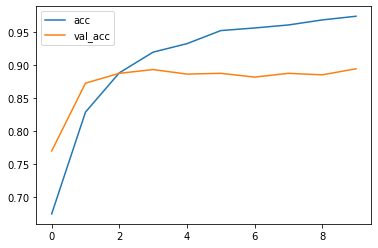

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

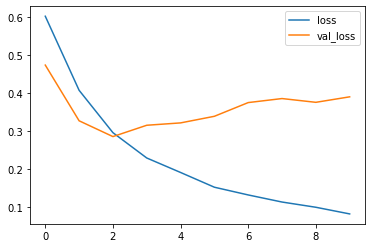

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [ ]:
test_sentence1 = "I would buy apple stock right now"
predict_sentiment(test_sentence1)

test_sentence2 = "Bank of America Profit Falls 8%"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 449ms/step
Predicted label:  Positive
1/1 [==============================] - 0s 37ms/step
Predicted label:  Negative


In [ ]:
model.save("SAM.h5")
from google.colab import files

files.download('SAM.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>